# `Data Mining Lab02 (230918)`



# ✅ 3주차 수업 내용
- Graph Component
- Undirected/Directed Graph
- Adjacency Matrix
- Other Graphs

# ✅ [Lab02] 실습 목표
- dgl을 이용하여 다양한 그래프 정의해보기
- dgl을 이용하여 직접 그래프 정의해보기

# `[Environment Setting]`

In [1]:
# install dgl
# https://www.dgl.ai/pages/start.html

!pip install -q dgl-cu113 dglgo -f https://data.dgl.ai/wheels/repo.html #dgl -> 그래프 라이브러리

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import dgl #그래프 learning에 특화된 알고리즘 포함
import torch
import networkx as nx #마이닝 할 때 많이 씀 -> 시각화 풍부하게 제공

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


# `1. DGL 라이브러리를 이용한 그래프 정의 `
- DGL (Deep Graph Library): 그래프 신경망 알고리즘을 효율적으로 구현하고 실험하는데 특화된 Python 라이브러리입니다.

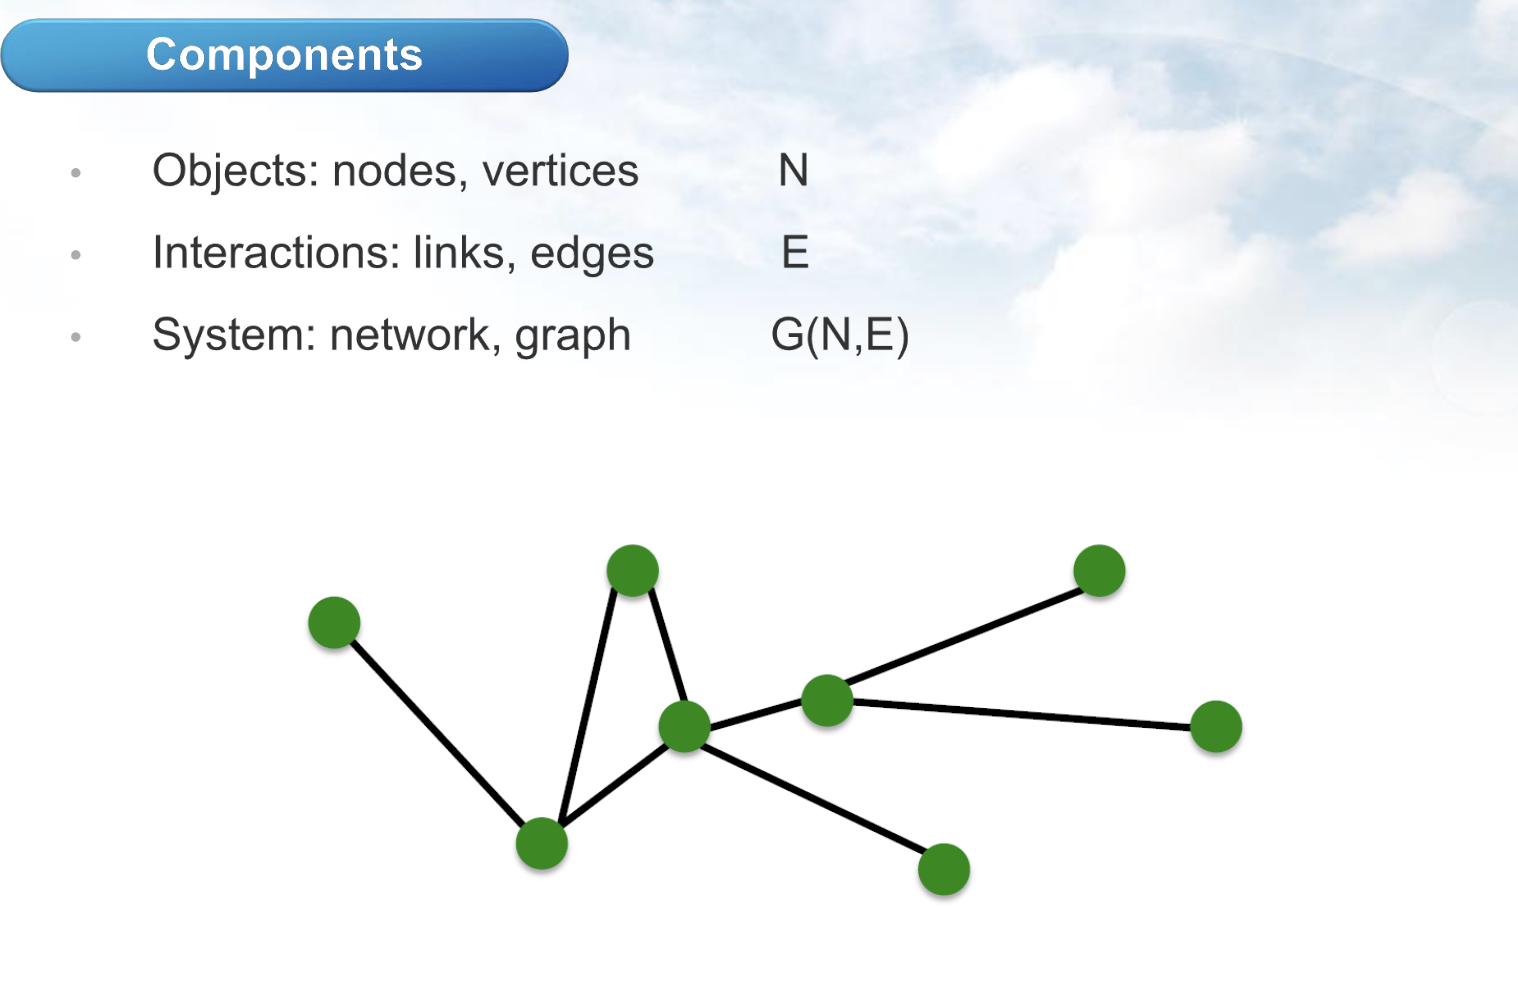

하나의 그래프(G)를 구성하기 위해서는 노드(Node)와 엣지(Edge)가 필요함.


  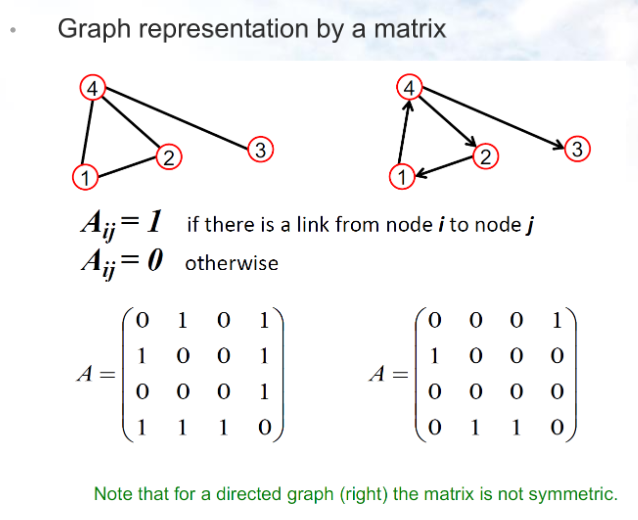

그래프는 엣지가 양방향이냐, 단방향이냐에 따라 두 가지 타입으로 나뉨.

1. directional graph : 엣지에 방향이 존재함.
2. undirectional graph : 엣지에 방향이 존재하지 않음. (=bidirectional graph)


## 1-1. Directional Graph 정의

In [4]:
u, v = torch.tensor([0, 1, 3, 3]), torch.tensor([3, 0, 1, 2]) #출발하는 노드의 인덱스 , 도착하는 노드 인덱스 (0, 3)번 노드 연결
g = dgl.graph((u, v)) #그래프 내부에 튜플 형태로 넣어주기

In [5]:
# number of nodes are inferred from the max node IDs in the given edges
print(g)

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})


In [6]:
# Node IDs
print("== Node IDs: ", g.nodes())

== Node IDs:  tensor([0, 1, 2, 3])


In [7]:
# Edge IDs
print("== Edge IDs: ", g.edges())

== Edge IDs:  (tensor([0, 1, 3, 3]), tensor([3, 0, 1, 2]))


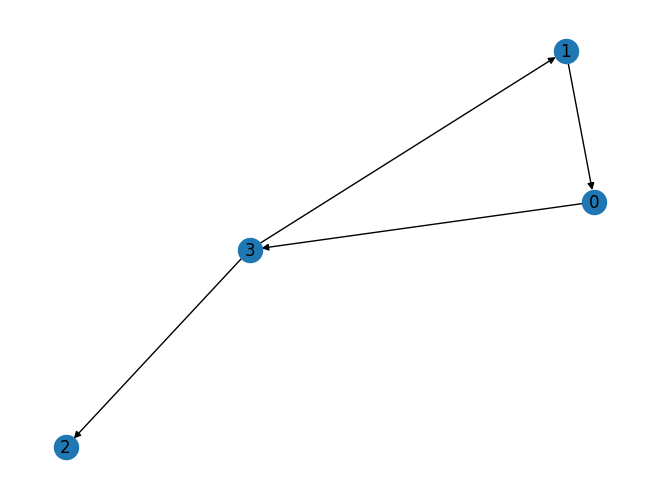

In [8]:
# visualization
nx_G = dgl.to_networkx(g)
nx.draw(nx_G, with_labels=True)

## 1-2. Undirectional Graph 정의

In [9]:
u, v = torch.tensor([0, 1, 3, 3]), torch.tensor([3, 0, 1, 2])
g = dgl.graph((u, v))

In [10]:
# number of nodes are inferred from the max node IDs in the given edges
print(g)

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})


In [11]:
bg = dgl.to_bidirected(g) #반대방향 엣지도 추가
print(bg)

Graph(num_nodes=4, num_edges=8,
      ndata_schemes={}
      edata_schemes={})


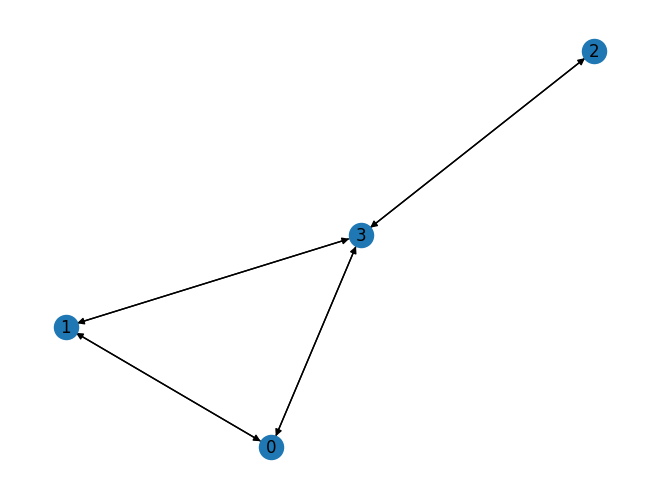

In [12]:
# visualization
nx_G = dgl.to_networkx(bg)
nx.draw(nx_G, with_labels=True)

## 1-3. Adjacency Matrix로 그래프 정의

In [13]:
# defining adjacency matrix
adj = torch.tensor([[0,0,0,1],[1,0,0,0],[0,0,0,0],[0,1,1,0]]) #tensor에 2차원 배열 그대로 옮겨줌
print("== Adjacency matrix: \n", adj)

== Adjacency matrix: 
 tensor([[0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 1, 1, 0]])


In [14]:
# extracting nonzero-idx -> 0가 아닌 숫자값을 가진 포인트들의 행과 인덱스 -> 출발노드와 도착노드로 사용
adj_t = torch.nonzero(adj).T
print("== adj to edge list: \n", adj_t)

== adj to edge list: 
 tensor([[0, 1, 3, 3],
        [3, 0, 1, 2]])


In [15]:
# creating a graph
u,v = adj_t[0], adj_t[1]
g = dgl.graph((u, v))

print(g)

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})


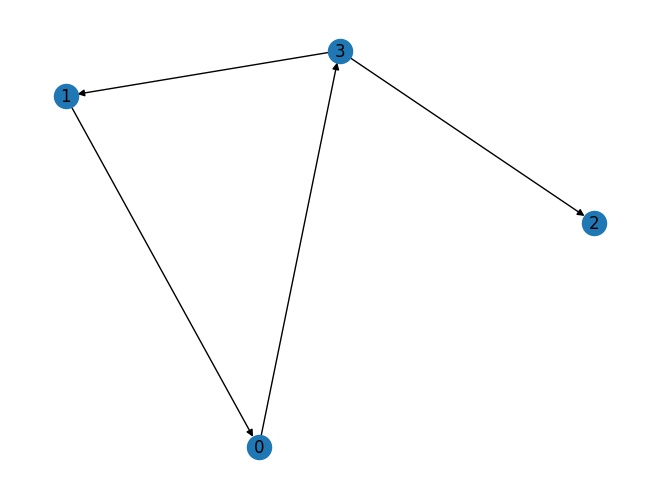

In [16]:
# visualization
nx_G = dgl.to_networkx(g)
nx.draw(nx_G, with_labels=True)

In [17]:
# to bidirectional graph
bg = dgl.to_bidirected(g)
print(bg)

Graph(num_nodes=4, num_edges=8,
      ndata_schemes={}
      edata_schemes={})


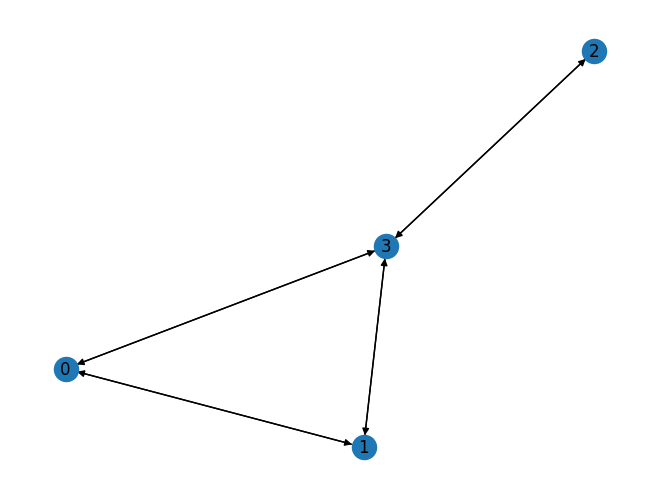

In [18]:
# visualization
nx_G = dgl.to_networkx(bg)
nx.draw(nx_G, with_labels=True)

## 1-4. Degree
- 인접노드의 개수
- Directional Graph에서는 in-degree / out-degree 각각 존재함.

In [19]:
g # directional graph

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

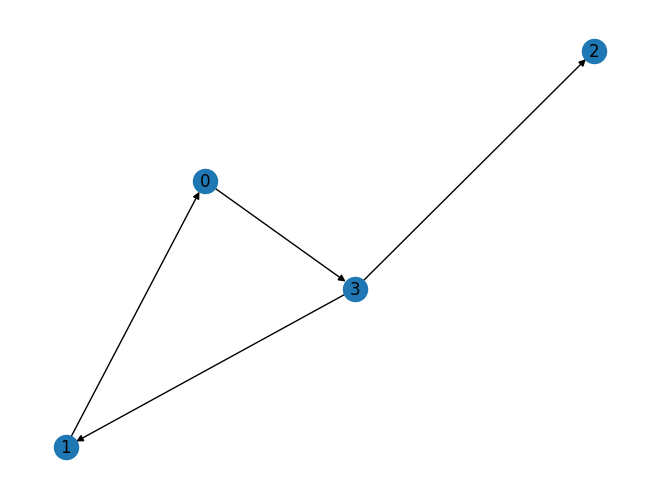

In [20]:
# visualization
nx_G = dgl.to_networkx(g)
nx.draw(nx_G, with_labels=True)

In [21]:
# 각 노드의 degree
print("== # of in_degrees: ", g.in_degrees([0, 1, 2, 3])) #확인할 노드의 인덱스 번호
print("== # of out_degrees: ", g.out_degrees([0, 1, 2, 3]))

== # of in_degrees:  tensor([1, 1, 1, 1])
== # of out_degrees:  tensor([1, 1, 0, 2])


In [22]:
bg # bidirectional graph

Graph(num_nodes=4, num_edges=8,
      ndata_schemes={}
      edata_schemes={})

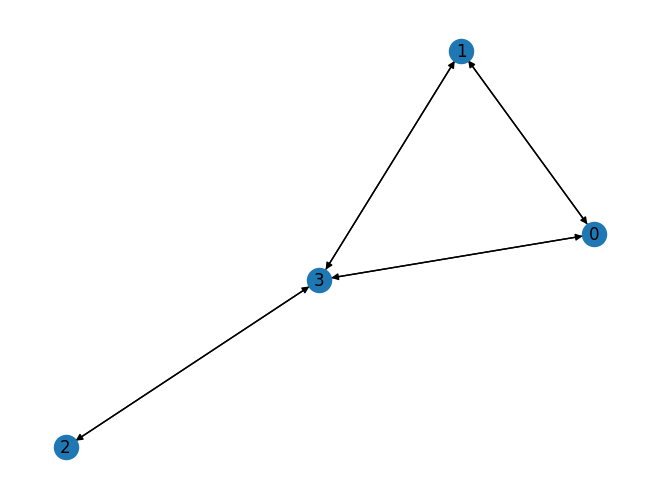

In [23]:
# visualization
nx_G = dgl.to_networkx(bg)
nx.draw(nx_G, with_labels=True)

In [24]:
# 각 노드의 degree
print("== # of in_degrees: ", bg.in_degrees([0, 1, 2, 3]))
print("== # of out_degrees: ", bg.out_degrees([0, 1, 2, 3]))

== # of in_degrees:  tensor([2, 2, 1, 3])
== # of out_degrees:  tensor([2, 2, 1, 3])


bidirectional graph에서는 방향 구분이 없으므로 in/out degree가 같음.

---

# ` 2. DGL 라이브러리를 이용한 다양한 그래프 정의`

## 2-1. 완전 그래프 (Complete Graph)
- 모든 노드가 연결되어 있는 그래프 (self-loop제외)

In [25]:
u, v = torch.tensor([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]), torch.tensor([1,2,3,0,2,3,0,1,3,0,1,2])
g_complete = dgl.graph((u, v))
g_complete

Graph(num_nodes=4, num_edges=12,
      ndata_schemes={}
      edata_schemes={})

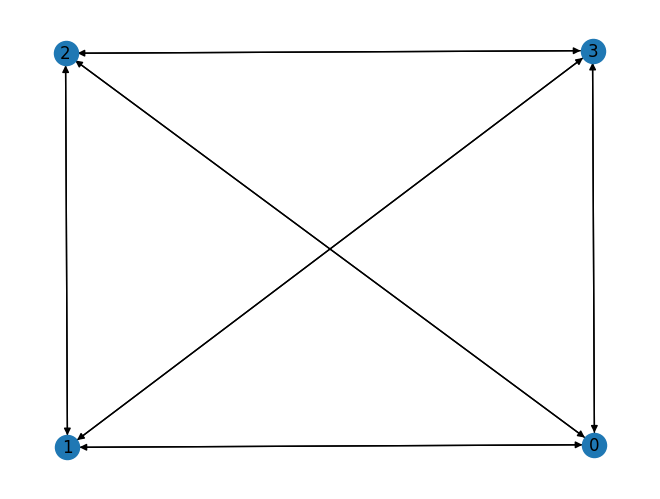

In [26]:
nx_complete = dgl.to_networkx(g_complete)
nx.draw(nx_complete, with_labels=True)

In [27]:
print("== # of in_degrees: ", g_complete.in_degrees())
print("== # of out_degrees: ", g_complete.out_degrees())

== # of in_degrees:  tensor([3, 3, 3, 3])
== # of out_degrees:  tensor([3, 3, 3, 3])


## 2-2. 이종 그래프 (Heterogeneous Graph)
- 노드 타입이 두 개 이상인 그래프

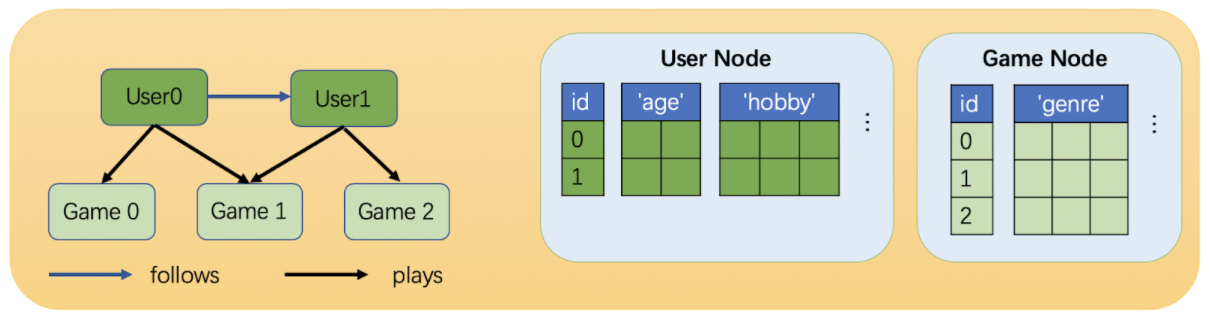

[자료 출처] DGL Libarary

In [28]:
# heterogeneous graph
graph_data = {
    ('user', 'follows', 'user'): (torch.tensor([0]), #출발노드와 도착노드 지정은 같음
                                  torch.tensor([1])),
    ('user', 'plays', 'game'): (torch.tensor([0, 0, 1, 1]), #엣지가 두 종류가 있기 때문에 각각 지정을 해주어야함
                                torch.tensor([0, 1, 1, 2]))
    }

In [29]:
g = dgl.heterograph(graph_data)
print("== hetero-graph : \n", g)
print()

== hetero-graph : 
 Graph(num_nodes={'game': 3, 'user': 2},
      num_edges={('user', 'follows', 'user'): 1, ('user', 'plays', 'game'): 4},
      metagraph=[('user', 'user', 'follows'), ('user', 'game', 'plays')])



In [30]:
# dgl.heterograph() 에서 노드,엣지 타입 다루기
print("== 'user' 노드 개수: ",g.num_nodes('user')) #hetero- 는 노드 이름 꼭 지정해서 확인
print("== 'game' 노드 개수: ",g.num_nodes('game'))
print("== 'user' 노드 IDs: ",g.nodes('user'))
print("== 'game' 노드 IDs: ",g.nodes('game'))

== 'user' 노드 개수:  2
== 'game' 노드 개수:  3
== 'user' 노드 IDs:  tensor([0, 1])
== 'game' 노드 IDs:  tensor([0, 1, 2])


보다 자세한 이종 그래프에 대한 설명은 나중에 진행

## 2-3. 이분 그래프 (Bipartite Graph)
- 노드 집합을 두 개의 독립된 그룹으로 나눌 수 있는 그래프
- Heterogeneous Graph의 special case

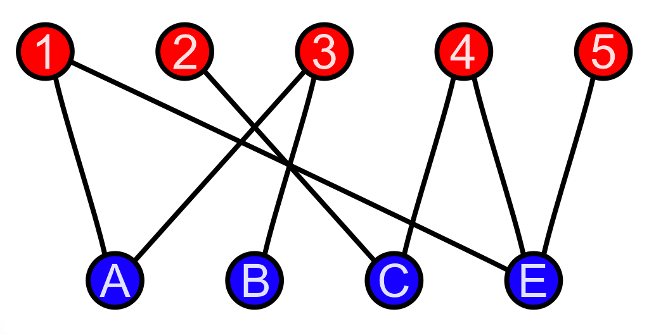

In [31]:
graph_data = {
   ('user', 'plays', 'game'): (torch.tensor([0,0,0,1,1,1,2,2]),
                               torch.tensor([0,1,2,0,1,3,0,3]))
}

In [32]:
g = dgl.heterograph(graph_data)
print("== bipartite-graph: \n", g)

== bipartite-graph: 
 Graph(num_nodes={'game': 4, 'user': 3},
      num_edges={('user', 'plays', 'game'): 8},
      metagraph=[('user', 'game', 'plays')])


In [33]:
print("== Node types: ",g.ntypes)
print("== Edge types: ",g.etypes)
print("== Typical edge types  : ",g.canonical_etypes) #명확하게 어떤 노드가 어떤 노드로 가는지

== Node types:  ['game', 'user']
== Edge types:  ['plays']
== Typical edge types  :  [('user', 'plays', 'game')]


In [34]:
# dgl.heterograph() 에서 노드,엣지 타입 다루기
print("== 'user' 노드 개수: ",g.num_nodes('user'))
print("== 'game' 노드 개수: ",g.num_nodes('game'))
print("== 'user' 노드 IDs: ",g.nodes('user'))
print("== 'game' 노드 IDs: ",g.nodes('game'))

== 'user' 노드 개수:  3
== 'game' 노드 개수:  4
== 'user' 노드 IDs:  tensor([0, 1, 2])
== 'game' 노드 IDs:  tensor([0, 1, 2, 3])


### [Error Case]
Node type name must be specified if there are more than one node types.

In [35]:
# g.nodes() -> 노드 타입을 지정해주지 않아서

DGLError: ignored

### [Visualization]
 - heterogeneous 타입은 to_networkx() 지원 안 됨.
 - homogeneous graph로 변환한 뒤 to_networkx() 사용
 - dgl.NTYPE : 이종 그래프에서 노드의 유형을 나타내는 키

In [36]:
g_hete2homo = dgl.to_homogeneous(g) # homoegeneous graph로 변경

In [37]:
print("== Node types: " ,g.ntypes)
print("== Node type of each node: ", g_hete2homo.ndata[dgl.NTYPE]) #game이라는 노드 인덱스 앞에서 4개
print("== # of nodes: ", g_hete2homo.num_nodes())

== Node types:  ['game', 'user']
== Node type of each node:  tensor([0, 0, 0, 0, 1, 1, 1])
== # of nodes:  7


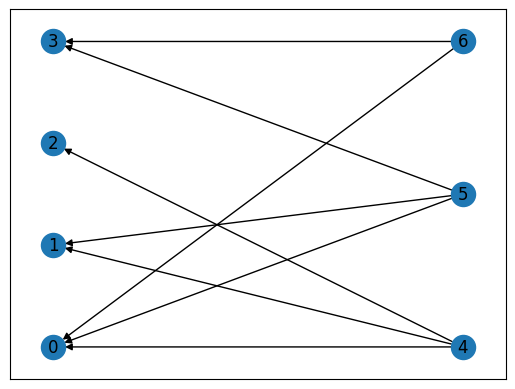

In [38]:
nx_hete2homo = dgl.to_networkx(g_hete2homo)
nx.draw_networkx(
    nx_hete2homo,
    pos = nx.drawing.layout.bipartite_layout(nx_hete2homo, [0,1,2,3])) #한쪽에 있을 노드들의 인덱스 (하나의 노드 타입)

---

# `3. 그래프에 다양한 속성 추가하기`

## 3-1. Node Attrebute 추가하기

In [39]:
g = dgl.graph(([0, 0, 1, 5], [1, 2, 2, 0])) # 6 nodes, 4 edges
print(g)

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={}
      edata_schemes={})


In [40]:
g.ndata['x_n'] = torch.ones(g.num_nodes(), 3)  # 6 node feature of length 3 => torch.Size([6, 3])
print("== Node attribute x_n and size: \n" ,g.ndata['x_n'], g.ndata['x_n'].size() )

== Node attribute x_n and size: 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) torch.Size([6, 3])


In [41]:
# different names can have different shapes
g.ndata['y'] = torch.randn(g.num_nodes(), 5)
print(g)

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x_n': Scheme(shape=(3,), dtype=torch.float32), 'y': Scheme(shape=(5,), dtype=torch.float32)}
      edata_schemes={})


## 3-2. Edge Weight 추가하기

In [42]:
edges = torch.tensor([0, 0, 0, 1]), torch.tensor([1, 2, 3, 3])
weights = torch.tensor([0.1, 0.6, 0.9, 0.7])  # weight of each edge

In [43]:
g = dgl.graph(edges)
print(g)

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})


In [44]:
g.edata['w'] = weights  # give it a name 'w'
print(g)
print("== Edge weight w: \n" ,g.edata['w'])

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)})
== Edge weight w: 
 tensor([0.1000, 0.6000, 0.9000, 0.7000])


## 3-3. self-loops 추가하기

In [45]:
# homogeneous graph
g = dgl.graph((torch.tensor([0, 0, 2]), torch.tensor([2, 1, 0])))
g.ndata['hv'] = torch.arange(3).float().reshape(-1, 1)
print(g)

Graph(num_nodes=3, num_edges=3,
      ndata_schemes={'hv': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={})


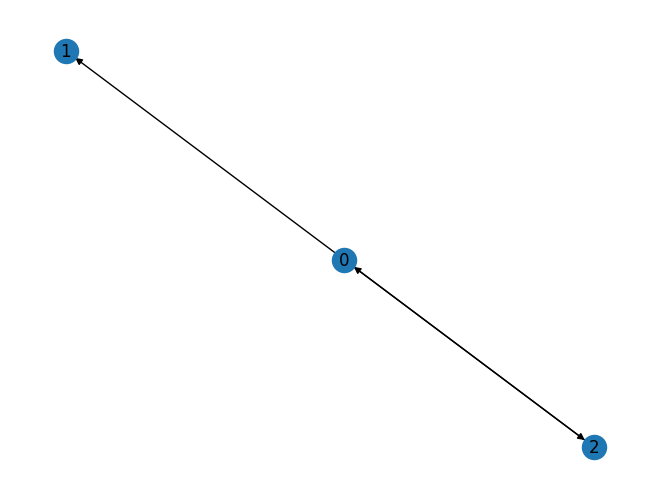

In [46]:
nx_g = dgl.to_networkx(g)
nx.draw(nx_g, with_labels=True)

In [47]:
g_loop = dgl.add_self_loop(g)
print(g_loop)

Graph(num_nodes=3, num_edges=6,
      ndata_schemes={'hv': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={})


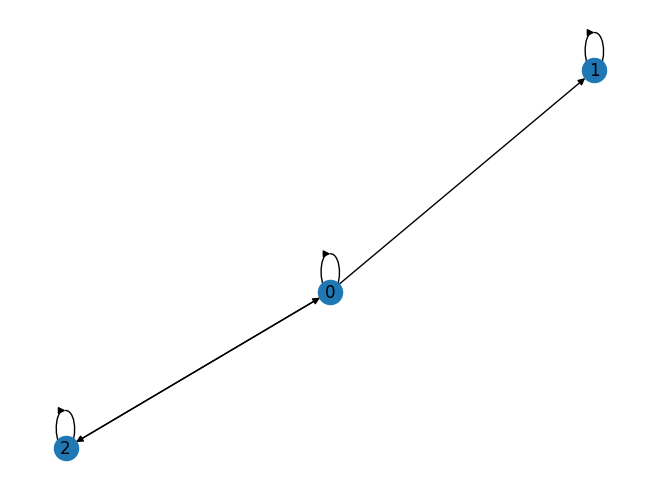

In [48]:
nx_g = dgl.to_networkx(g_loop)
nx.draw(nx_g, with_labels=True)

---

## 수고하셨습니다.

---
